In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [22]:
# Load the JSON file
with open("../data/playback_data/TrackNotPlayed_Hourly.json", "r") as f:
    data = json.load(f)

In [23]:
# Convert JSON to DataFrame
df = pd.DataFrame(data)

In [24]:
# Load the TrackNotPlayed JSON file
df = pd.read_json("../data/playback_data/TrackNotPlayed_Hourly.json")

# **How often are tracks not played?**

In [27]:
# Count reasons for not playing
not_played_count = df["message_reason_not_played"].value_counts()


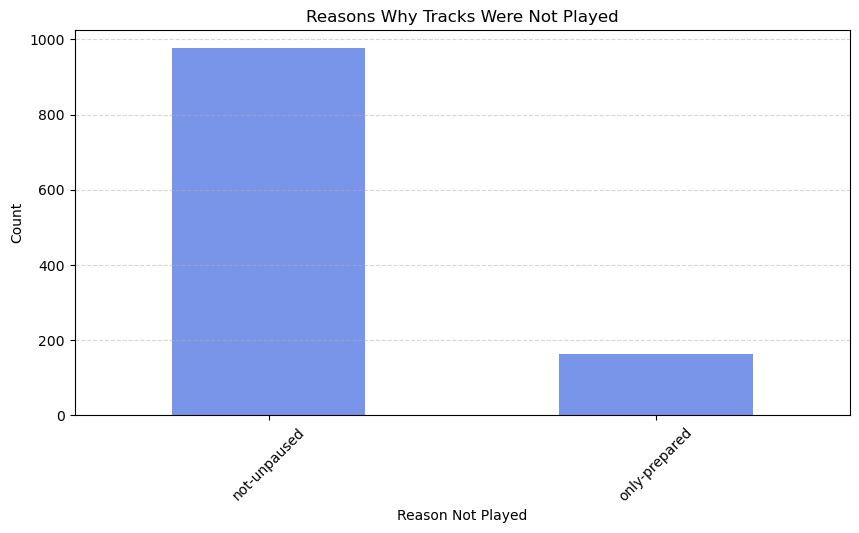

In [30]:
# Plot a bar chart
plt.figure(figsize=(10, 5))  # ✅ Fix: Use plt.figure() correctly
not_played_count.plot(kind="bar", color="royalblue", alpha=0.7)
plt.xlabel("Reason Not Played")
plt.ylabel("Count")
plt.title("Reasons Why Tracks Were Not Played")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

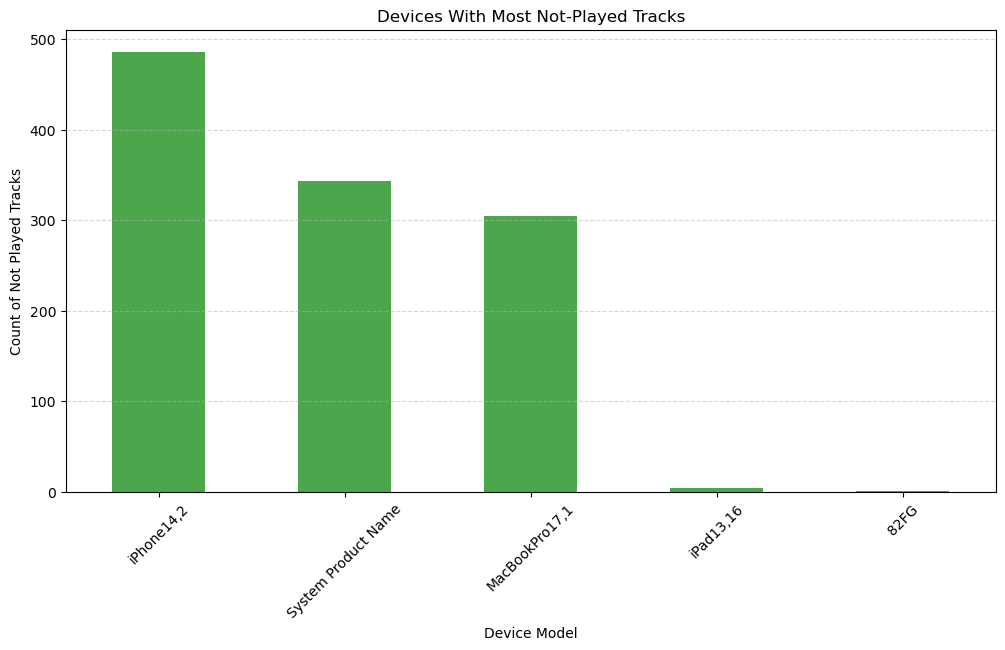

In [32]:
# Count occurrences by device model
device_counts = df["context_device_model"].value_counts().head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
device_counts.plot(kind="bar", color="green", alpha=0.7)
plt.xlabel("Device Model")
plt.ylabel("Count of Not Played Tracks")
plt.title("Devices With Most Not-Played Tracks")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


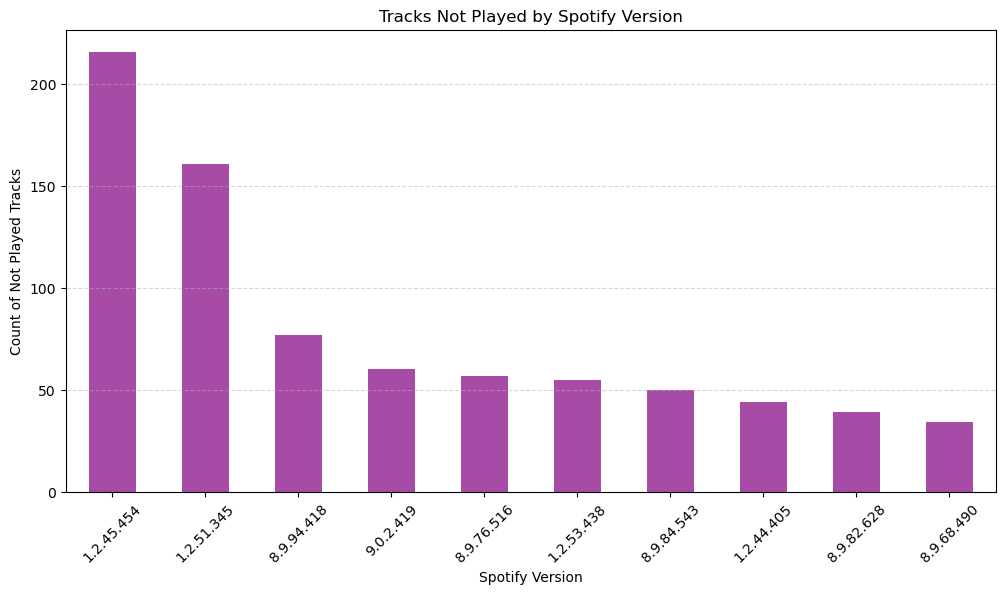

In [33]:
# Count occurrences by Spotify version
version_counts = df["context_application_version"].value_counts().head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
version_counts.plot(kind="bar", color="purple", alpha=0.7)
plt.xlabel("Spotify Version")
plt.ylabel("Count of Not Played Tracks")
plt.title("Tracks Not Played by Spotify Version")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


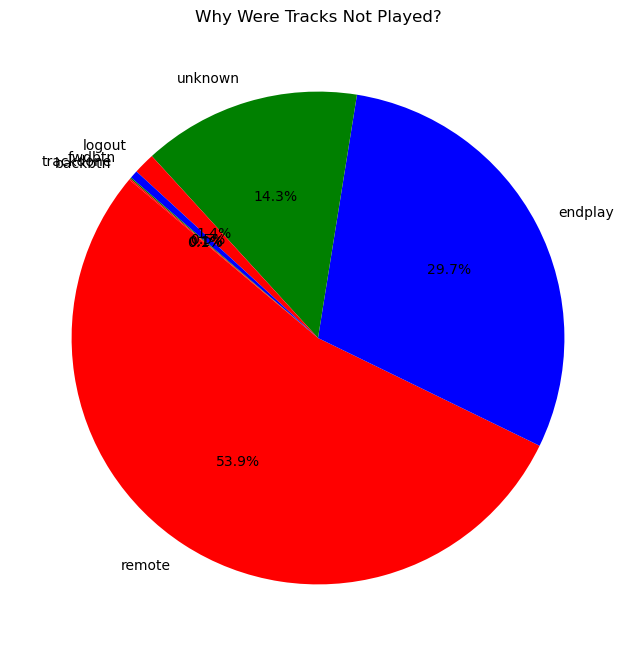

In [34]:
# Count occurrences of end reasons
end_reasons = df["message_reason_end"].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
end_reasons.plot(kind="pie", autopct="%1.1f%%", colors=["red", "blue", "green"], startangle=140)
plt.title("Why Were Tracks Not Played?")
plt.ylabel("")  # Remove default y-axis label
plt.show()


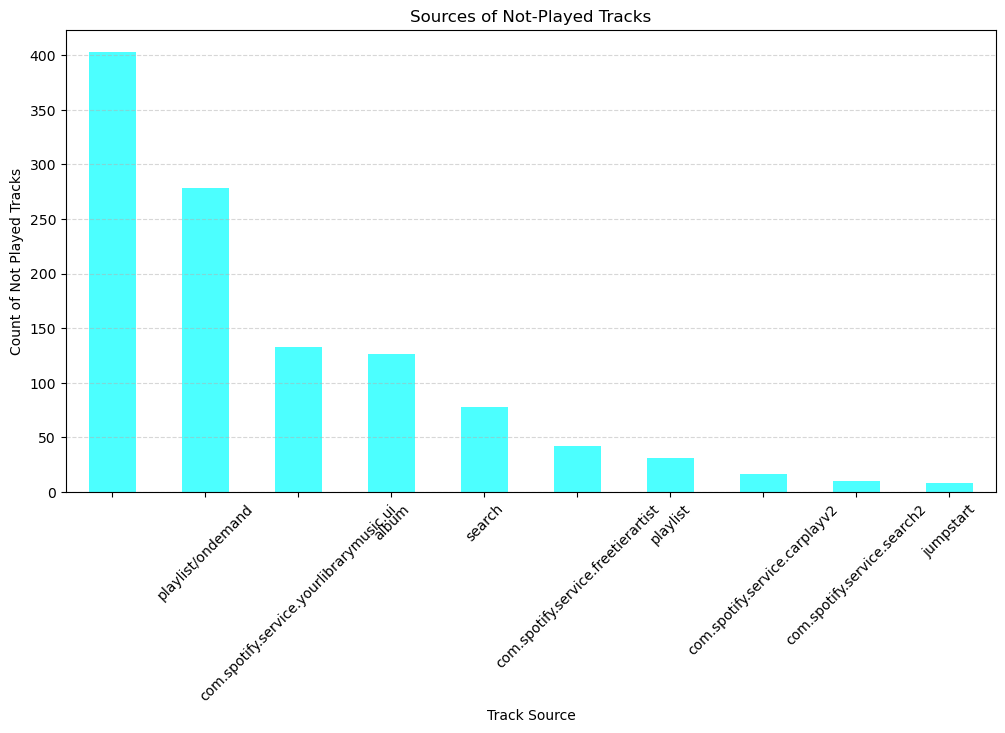

In [35]:
# Count occurrences of sources
source_counts = df["message_source_start"].value_counts().head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
source_counts.plot(kind="bar", color="cyan", alpha=0.7)
plt.xlabel("Track Source")
plt.ylabel("Count of Not Played Tracks")
plt.title("Sources of Not-Played Tracks")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


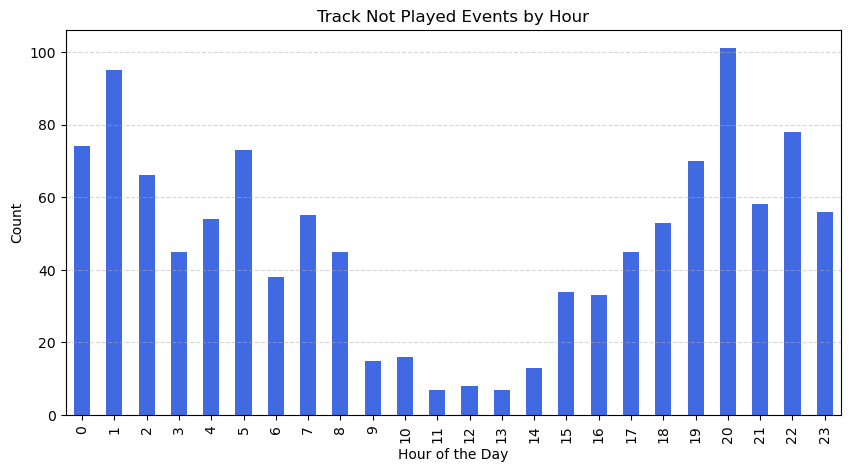

In [36]:
df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"])
df["hour"] = df["timestamp_utc"].dt.hour
df["day_of_week"] = df["timestamp_utc"].dt.day_name()

# Count failures by hour
hourly_failures = df["hour"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
hourly_failures.plot(kind="bar", color="royalblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.title("Track Not Played Events by Hour")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()